In [78]:
%pylab inline
%load_ext rpy2.ipython
import pandas.rpy.common as com

Populating the interactive namespace from numpy and matplotlib
The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic


In [79]:
%R load(url("http://www.openintro.org/stat/data/kobe.RData"))

<StrVector - Python:0x0000000007C83FC8 / R:0x0000000007BE0240>
['calc_streak', 'kobe']

In [82]:
kobe = com.load_data("kobe")

In [83]:
kobe[0:5]

,vs,game,quarter,time,description,basket
1,ORL,1,1,9:47,Kobe Bryant makes 4-foot two point shot,H
2,ORL,1,1,9:07,Kobe Bryant misses jumper,M
3,ORL,1,1,8:11,Kobe Bryant misses 7-foot jumper,M
4,ORL,1,1,7:41,Kobe Bryant makes 16-foot jumper (Derek Fisher...,H
5,ORL,1,1,7:03,Kobe Bryant makes driving layup,H


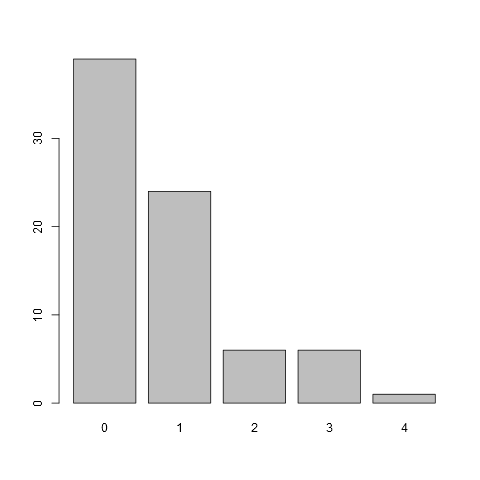

In [84]:
%%R
kobe_streak <- calc_streak(kobe$basket)
barplot(table(kobe_streak))

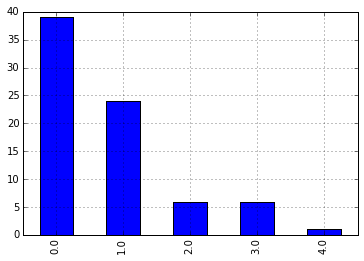

In [106]:
kobe_streak = pd.Series(com.load_data("kobe_streak"))
from collections import Counter
pd.Series(Counter(kobe_streak)).plot(kind='bar')

In [142]:
%%R
outcomes <- c("H", "M")
sample(outcomes, size = 1, replace = TRUE)
sim_streaks <- sample(outcomes, size = 100, replace = TRUE, prob = c(0.45, 0.55))
sim_streaks
t = table(sim_streaks)

In [143]:
com.load_data("t")

,sim_streaks,value
0,H,46
1,M,54


In [158]:
result = np.random.choice(['H', 'M'], size=122, replace=True, p=[0.45,0.55])
len(result[result=='H']), len(result[result=='M'])

(48, 74)

In [159]:
len(result[result=='H'])

48

In [160]:
%Rpush result

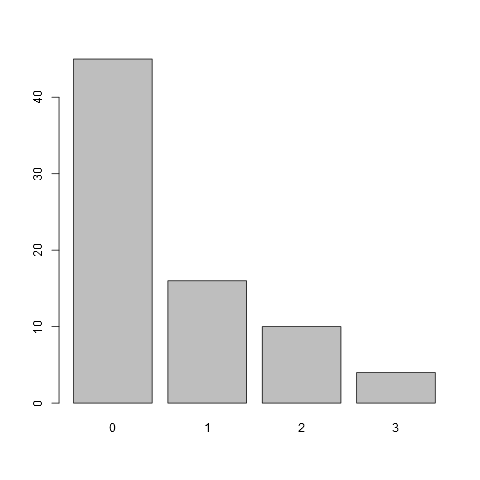

In [161]:
%%R
result_streak <- calc_streak(result)
barplot(table(result_streak))

In [ ]:
# would be interesting to use this to analyze up and down runs of returns or price_up/price_down

%R load(url("http://www.openintro.org/stat/data/ames.RData"))

In [164]:
ames = com.load_data("ames")

In [165]:
ames.describe()

,Order,PID,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Mas.Vnr.Area,...,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [176]:
area = ames['Gr.Liv.Area']
area.describe()

count    2930.000000
mean     1499.690444
std       505.508887
min       334.000000
25%      1126.000000
50%      1442.000000
75%      1742.750000
max      5642.000000
dtype: float64

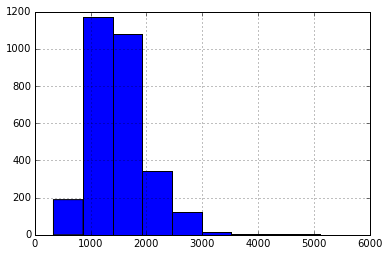

In [189]:
area.hist(bins=10)

In [178]:
len(area[area<=area.median()]) / len(area)

0.5010238907849829

In [179]:
len(area[area<=1500]) / len(area)

0.5539249146757679

In [186]:
pd.Series(np.random.choice(len(area), 100)).describe()

count     100.000000
mean     1489.320000
std       882.315856
min         1.000000
25%       769.250000
50%      1593.500000
75%      2226.500000
max      2905.000000
dtype: float64

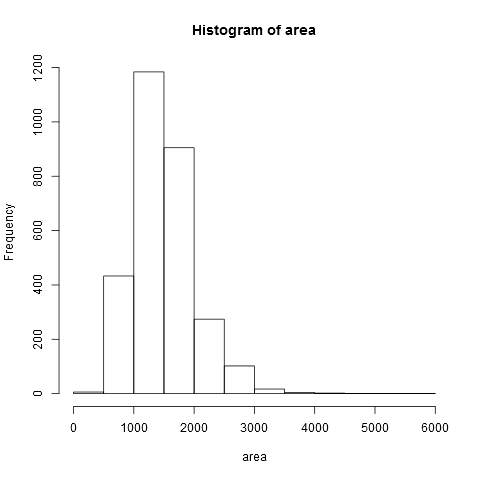

In [187]:
%%R
area <- ames$Gr.Liv.Area
price <- ames$SalePrice
summary(area)
hist(area)

In [190]:
%R mean(area)

<FloatVector - Python:0x000000000CBFD748 / R:0x0000000007B3A5E8>
[1499.690444]

In [191]:
%R samp0 = sample(area, 50)

<IntVector - Python:0x000000000FD87A48 / R:0x0000000009041CD0>
[    1217,      864,     1052, ...,     1582,     2377,     1239]

In [192]:
%R mean(samp0)

<FloatVector - Python:0x000000000FD30648 / R:0x0000000007B16478>
[1426.180000]

In [195]:
%R samp1 <- sample(area, 50)


<IntVector - Python:0x000000000FD95B88 / R:0x000000000799CF70>
[    1626,     1654,     2112, ...,     1528,     1456,     2495]

In [196]:
%R mean(samp1)

<FloatVector - Python:0x000000000FD28EC8 / R:0x0000000007A9F2D8>
[1546.220000]

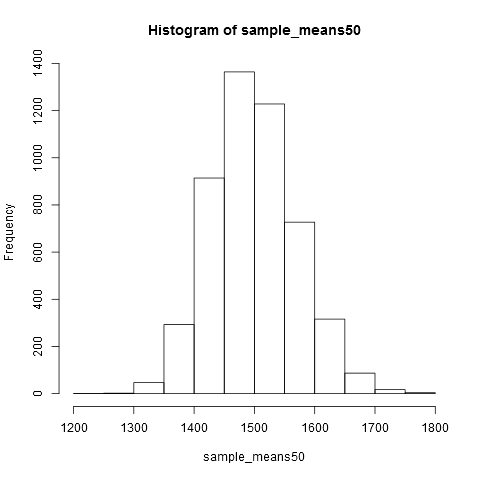

In [197]:
%%R
sample_means50 <- rep(NA, 5000)

for(i in 1:5000){
   samp <- sample(area, 50)
   sample_means50[i] <- mean(samp)
   }

hist(sample_means50)

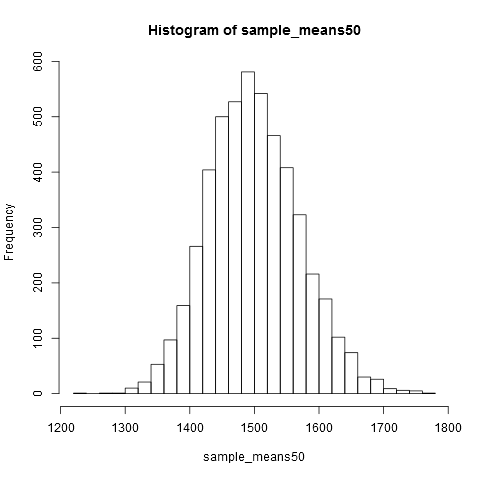

<ListVector - Python:0x000000000FBA2A88 / R:0x000000000B1B0090>
[Float..., IntVe..., Float..., Float..., StrVe..., Vector]
  breaks: <class 'rpy2.robjects.vectors.FloatVector'>
  <FloatVector - Python:0x000000000FBE7288 / R:0x000000000AA5DDB0>
[1220.000000, 1240.000000, 1260.000000, ..., 1740.000000, 1760.000000, 1780.000000]
  counts: <class 'rpy2.robjects.vectors.IntVector'>
  <IntVector - Python:0x000000000FC8D3C8 / R:0x000000000ADEA968>
[       1,        0,        1, ...,        6,        5,        1]
  density: <class 'rpy2.robjects.vectors.FloatVector'>
  <FloatVector - Python:0x000000000FD9B9C8 / R:0x00000000089632D8>
[0.000010, 0.000000, 0.000010, ..., 0.000060, 0.000050, 0.000010]
  mids: <class 'rpy2.robjects.vectors.FloatVector'>
  <FloatVector - Python:0x000000000FD95C88 / R:0x00000000089634F8>
[1230.000000, 1250.000000, 1270.000000, ..., 1730.000000, 1750.000000, 1770.000000]
  xname: <class 'rpy2.robjects.vectors.StrVector'>
  <StrVector - Python:0x000000000FD76248 / R:0x

In [198]:
%R hist(sample_means50, breaks = 25)

In [199]:
%R mean(sample_means50)

<FloatVector - Python:0x000000000D00CF08 / R:0x00000000079AAD88>
[1499.291744]

In [218]:
def sample_means(data, size, no_of_samples):
    sample_means = []
    for i in range(no_of_samples):
        sample_means.append(pd.Series(np.random.choice(len(data), size)).mean())
    return sample_means, np.average(sample_means)

In [211]:
print (sample_means(area, 10, 5000), sample_means(area, 100, 5000))

1465.97212 1466.568096


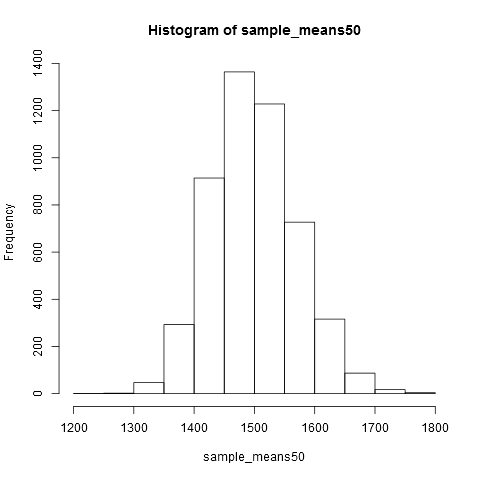

<ListVector - Python:0x000000000FDD2988 / R:0x000000000B1B2580>
[Float..., IntVe..., Float..., Float..., StrVe..., Vector]
  breaks: <class 'rpy2.robjects.vectors.FloatVector'>
  <FloatVector - Python:0x000000000FDD3348 / R:0x000000000B1BBF00>
[1200.000000, 1250.000000, 1300.000000, ..., 1700.000000, 1750.000000, 1800.000000]
  counts: <class 'rpy2.robjects.vectors.IntVector'>
  <IntVector - Python:0x000000000FDD3788 / R:0x000000000B1B2108>
[       1,        2,       47, ...,       87,       17,        4]
  density: <class 'rpy2.robjects.vectors.FloatVector'>
  <FloatVector - Python:0x000000000FDD3C88 / R:0x000000000B1B0EB8>
[0.000004, 0.000008, 0.000188, ..., 0.000348, 0.000068, 0.000016]
  mids: <class 'rpy2.robjects.vectors.FloatVector'>
  <FloatVector - Python:0x000000000FDD41C8 / R:0x000000000B1B1008>
[1225.000000, 1275.000000, 1325.000000, ..., 1675.000000, 1725.000000, 1775.000000]
  xname: <class 'rpy2.robjects.vectors.StrVector'>
  <StrVector - Python:0x000000000FDD3FC8 / R:0x

In [204]:
%R hist(sample_means50)

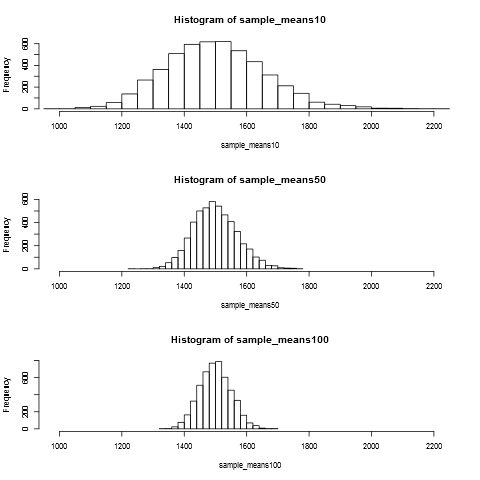

In [212]:
%%R
sample_means10 <- rep(NA, 5000)
sample_means100 <- rep(NA, 5000)

for(i in 1:5000){
  samp <- sample(area, 10)
  sample_means10[i] <- mean(samp)
  samp <- sample(area, 100)
  sample_means100[i] <- mean(samp)
}

par(mfrow = c(3, 1))

xlimits = range(sample_means10)

hist(sample_means10, breaks = 20, xlim = xlimits)
hist(sample_means50, breaks = 20, xlim = xlimits)
hist(sample_means100, breaks = 20, xlim = xlimits)

1465.48988
1465.461504
1466.267804


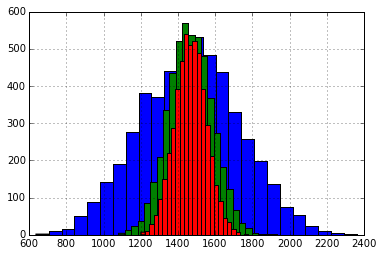

In [227]:
for n in [10,50,100]:
    sample_means_hat, mean_area_hat = sample_means(area, n, 5000)
    pd.Series(sample_means_hat).hist(bins=25)
    print (mean_area_hat)